# Certificate in Data Science | Milestone 3 |  
> University of Washington, Seattle, WA    
> January 2020  
> N. Hicks

## Assignment Instructions

Create a new notebook and perform each of the following tasks and answer the related questions:  
- Build a simple neural networks model.
- Build a DNN model.
- Build a RNN model.
- Summarize your findings with examples. Explain what the manufacturer should focus on to optimize the diaper manufacturing process.
- Solicit specific feedback on your code.

# Pre-Existing Work

As derived in previously accomplished assignments `Milestone 01` and `Milestone 02`.

## Establish the Datatset

### Import Libraries

In [1]:
'''
Import Required Libraries
'''
import pandas as pd
import numpy as np
import os

from imblearn.over_sampling import SMOTE
from collections import Counter

C:\Users\NateDogg\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\NateDogg\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\NateDogg\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be r

### Functions for Scripting

In [2]:
'''
Retrieve the prescribed dataset.
RETURN: pd.DataFrame
'''
def fetch_data(path, file):
    try:
        # import the file to a dataframe
        _df = pd.read_csv(path + file, sep=' ', header=None)
        print('REMOTE FILE USED')
    except:
        # Local Copy -- Link would not permit access
        path = os.getcwd()
        print('LOCAL FILE USED\n\n')
        # import the file to a dataframe
        _df = pd.read_csv(os.path.join(path, file))
    
    return _df

In [3]:
'''
Create a scale function for a single feature.
RETURN: a scaled column feature
'''
def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std

In [4]:
'''
Accomplish a 'train-test-validate' split of a provided dataset.
INPUT: pd.DataFrame
RETURN: pd.DataFrame| [train, validate, test]
'''
    # np.split will split at 60% of the length of the shuffled array,
    # then 80% of length (which is an additional 20% of data),
    # thus leaving a remaining 20% of the data.
    # This is due to the definition of the function.
def train_test_validate_split(_df):
    train, validate, test = np.split(_df.sample(frac=1), [int(.6*len(_df)), int(.8*len(_df))])
    print('TRAIN:    {}\nVALIDATE: {}\nTEST:     {}'.format(train.shape, validate.shape, test.shape))
    return [train, validate, test]

### Import the Data

In [5]:
# import the sensors dataset
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/secom/'
file_data = 'secom.data'
file_labels = 'secom_labels.data'
secom_df = fetch_data(path, file_data)
labels_df = fetch_data(path, file_labels)

REMOTE FILE USED
REMOTE FILE USED


## Wrangle the Data

In [6]:
# replace the 'NaN' values
secom_df  = secom_df.fillna(0)

In [7]:
# replace all '-1' values with '0' values
# this is a more standardized manner with which to display the target attribute
labels_df = labels_df.replace(-1, 0)

In [8]:
# Change the dtype of 'labels_df[1]' to datetime
cols = [1]
labels_df[cols] = labels_df[cols].apply(pd.to_datetime)

## Merge the DataFrames

In [9]:
df = secom_df.copy(deep=True)
last_col = len(df.columns)
labels_df = labels_df.rename(columns={0:last_col, 1:last_col+1})
labels_df.columns
df = pd.concat([df, labels_df], axis=1)

## Identify 'Mean Zero' Attributes

In [10]:
# return the mean-zero attributes
drop_cols = []
is_zero = np.mean(df)==0
for item in is_zero.index:
    if is_zero[item]==True:
        drop_cols.append(item)

# drop the mean-zero attributes from the DataFrame
df = df.drop(drop_cols, axis=1)

In [11]:
#re-name the columns, after the dropped attributes
new_cols = np.arange(0,len(df.columns))
i = 0

# rename the attributes, consecutively
for item in df.columns:
    df.rename(columns={item:new_cols[i]}, inplace=True)
    i += 1

## Scale the Attributes

In [12]:
# define a list of attributes to iterate 
drop_cols = [478, 479]
attributes = df.columns
attributes = np.delete(attributes, drop_cols)
target = drop_cols[0]

In [13]:
# establish the attributes and target
X = df.copy()
X = X.drop(drop_cols, axis=1)
y = df[target]

In [14]:
# scale the remaining features
for attr in attributes:
    X[attr] = scale(X[attr])

## Over-sample the Dataset

In [15]:
# oversample the dataset to balance it, for improved prediction capability
sm_res = SMOTE(random_state=43)
X_sm, y_sm = sm_res.fit_sample(X, y)
print('Resampled dataset shape {}'.format(Counter(y_sm)))

Resampled dataset shape Counter({0: 1463, 1: 1463})


C:\Users\NateDogg\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [16]:
# recombine the arrays, after oversampling, as DataFrames
smX_df = pd.DataFrame(X_sm)
smY_df = pd.DataFrame(y_sm)

oversampled_df = pd.concat([smX_df, smY_df], axis=1)
oversampled_df.columns = np.arange(0, oversampled_df.shape[1])

## Split Dataset - Train / Test / Validate

In [17]:
# establish the initial dataset split
split_data = train_test_validate_split(oversampled_df)   # [train, validate, test]

# re-assign the split results
print('-----------------------------------')
print('THE OVERSAMPLED DATASET is NOW SPLIT')
train_data = split_data[0]
val_data = split_data[1]
test_data = split_data[2]

TRAIN:    (1755, 479)
VALIDATE: (585, 479)
TEST:     (586, 479)
-----------------------------------
THE OVERSAMPLED DATASET is NOW SPLIT


In [18]:
# establish the features and target segmentations
# convert the DataFrame to numpy arrays
X_train = train_data[attributes].values
Y_train = train_data[target].values

X_test = test_data[attributes].values
Y_test = test_data[target].values

X_val = val_data[attributes].values
Y_val = val_data[target].values

# Current Work

## Functions for Scripting

In [19]:
'''
Create a numerically stable logistic
RETURN: np.array
'''
def sigmoid(x):
    x = np.clip(x, -500, 500)
    if x.any()>=0:
        return 1/(1 + np.exp(-x))
    else:
        return np.exp(x)/(1 + np.exp(x))
    
'''
Compute the gradient of the logistic
RETURN: np.array
'''
def sigmoid_grad(z):
    sg = sigmoid(z)
    return sg * (1 - sg)

In [20]:
'''
Randomly assign the weight vector matrices; input and output weights
RETURN: np.array
'''
def init_parameters(n_features, n_hidden, n_output):
    w1 = np.random.uniform(-1.0, 1.0,
                            size=(n_hidden * (n_features + 1))).reshape(n_hidden, n_features + 1)        
    w2 = np.random.uniform(-1.0, 1.0,
                            size=(n_output * (n_hidden + 1))).reshape(n_output, n_hidden + 1)
    return w1, w2

In [21]:
'''
Update the feature matrix with an additional bias unit of '1'
RETURN: np.array
'''
def add_bias_unit(bias_X, axis):
    if axis=='column':
        X_new = np.ones((bias_X.shape[0], bias_X.shape[1] + 1))
        X_new[:, 1:] = bias_X           # establish a new feature matrix
    elif axis=='row':
        X_new = np.ones((bias_X.shape[0] + 1, bias_X.shape[1]))
        X_new[1:, :] = bias_X           # establish a new feature matrix
    
    return X_new

In [22]:
'''
Forward propogation for the multi-layer perceptron network
RETURN: np.array| activation and transfer functions
'''
def fwd_prop(X_batch, w1, w2):
    # the input nodes
    a1 = add_bias_unit(X_batch, 'column')   # first, add a bias term of '1' as a new feature
    z2 = np.dot(w1, a1.T)   # dot product of the weights and X + bias
    a2 = sigmoid(z2)        # Use sigmoid function to create a predicted vector

    # the output nodes
    a2 = add_bias_unit(a2, 'row')
    z3 = np.dot(w2, a2)
    a3 = sigmoid(z3)
    return a1, a2, a3, z2, z3

In [23]:
'''
Calculate the gradient
'''
def get_grad(a1, a2, a3, z2, Y_batch, w1, w2):
    delta_z3 = a3 - Y_batch                           # subtract weights: actual from predicted
    z2 = add_bias_unit(z2, 'row')
    delta_z2 = w2.T.dot(delta_z3) * sigmoid_grad(z2)
    delta_z2 = delta_z2[1:, :]
    grad1 = delta_z2.dot(a1)
    grad2 = delta_z3.dot(a2.T)
    
    return grad1, grad2

In [24]:
'''
Backpropagate the network to achieve improved weight vectors
'''
def back_prop(a1, a2, a3, z2, w1, w2, X_batch, Y_batch):
    m = np.shape(X)[1] # used the calculate the cost by the number of inputs -1/m
    output = a3
    
    # Calculate the cost
    cost1 = -Y_batch * (np.log(output))
    cost2 = (1 - Y_batch) * np.log(1 - output)
    cost = (1/m) * np.sum(cost1 - cost2)

    # Calculate the gradient
    grad1, grad2 = get_grad(a1, a2, a3, z2, Y_batch, w1, w2)
    
    grads = {'dW1':grad1, 'dW2':grad2}              # Weight and bias vectors after backprop
    
    return grads, cost

In [25]:
'''
Run the gradient descent algorithm
'''
def run_grad_desc(num_epochs, eta, alpha, _X, _Y, n_features, n_hidden, n_output):
    loss_array = np.ones([num_epochs]) * np.nan         # resets the loss_array to NaNs
    
    # initialize the random weight matrices
    w1, w2 = init_parameters(n_features, n_hidden, n_output)

    # the momentum parameters
    delta_w1_prior = np.zeros(w1.shape)
    delta_w2_prior = np.zeros(w2.shape)
    
    # execute the training epoch
    for i in np.arange(num_epochs):
        X_data, Y_data = _X.copy(), _Y.copy()
        
        idx = np.random.permutation(Y_data.shape[0])     # shuffle the dataset for the epoch
        X_data, Y_data = X_data[idx], Y_data[idx]
        batch = np.array(range(Y_data.shape[0]))

        # apply the forward propagation for each feature vector
        a1, a2, a3, z2, z3 = fwd_prop(X_data[batch], w1, w2)             # get predicted vector
        grads, cost = back_prop(a1, a2, a3, z2, w1, w2, X_data[batch], Y_data[batch])       # get gradient and the cost from BP 
        loss_array[i] = cost                         # loss array gets cross ent values

        # Update the weight delta vectors (using momentum)
        delta_w1 = eta * grads['dW1']      # calc new weight vector
        delta_w2 = eta * grads['dW2']      # calc new bias vector
        
        # add the momentum terms to update the weights
        w1 -= (delta_w1 + (alpha * delta_w1_prior))
        w2 -= (delta_w2 + (alpha * delta_w2_prior))
        
        delta_w1_prior = delta_w1
        delta_w2_prior = delta_w2

        grads = {'dW1':delta_w1, 'dW2':delta_w2}   # Weight and bias vectors after back-prop
        parameter = {'W1':w1, 'W2':w2}             # assign

    return parameter, loss_array

## Simple Neural Network

### Functions for Scripting

In [26]:
'''
Set the resultant plot parameters.
RETURN: none.
'''
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# set for all notebook; width, height of the resulting plots
plt.rcParams["figure.figsize"] = [10, 6.5]   # [width, height]

sns.set()

In [27]:
def cart_plot(name, var, epochs):
    # report the trained network score 'cost / loss'
    print('Loss-Cost Score: {}'.format(np.round(loss_array[epochs-1], 3)))

    # plot the cost curve
    plt.plot(loss_array)
    plt.title('Multi-Layer Perceptron Network with Back-propagation\nTraining Loss vs. Total Epoches')
    plt.xlabel('{} = {}'.format(name, var))
    plt.grid()
    plt.show()

### Train the Network

TRAINING OF THE MULTI-LAYER PERCEPTRON NETWORK
Learning Rate: 0.001
Loss-Cost Score: 1.037


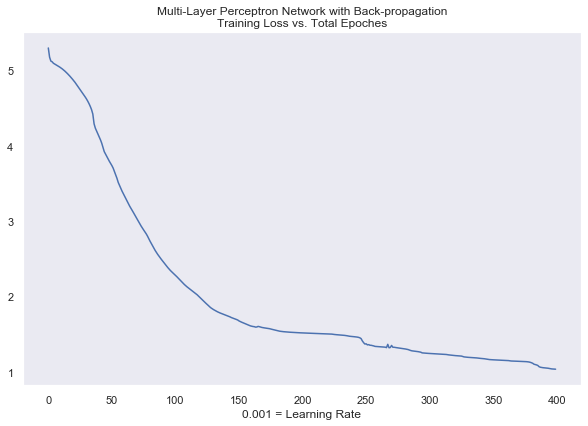

Learning Rate: 0.005
Loss-Cost Score: 1.174


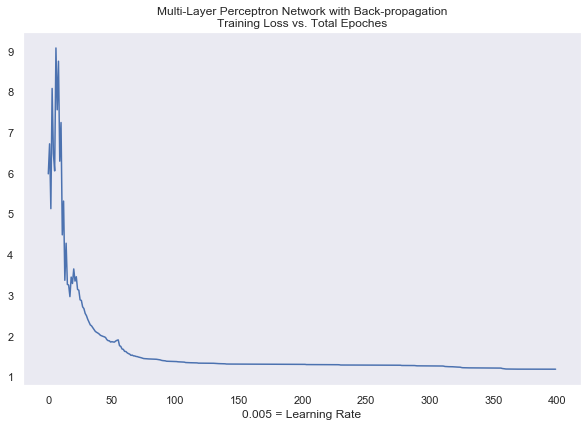

Learning Rate: 0.01
Loss-Cost Score: 1.991


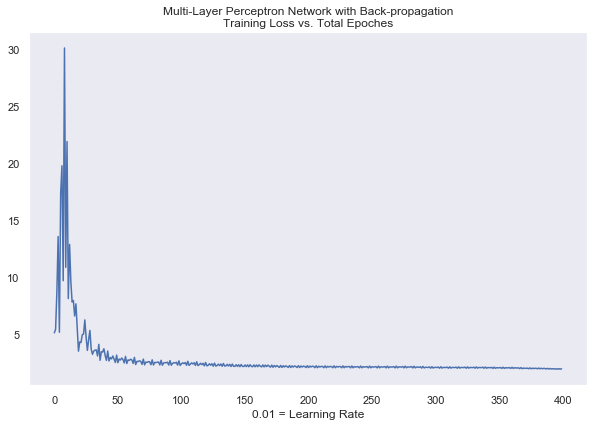

In [28]:
epochs = 400    # Number of Epochs
# eta = 0.01    # Learning Rate
alpha = 0.7     # Momentum
n_features = np.shape(X)[1]   # Number of nodes in a hidden layer
n_hidden = 1    # Number of Hidden Layers - Depth of Architecture
n_output = 2    # Number of Output_nodes; Binary=2

print('TRAINING OF THE MULTI-LAYER PERCEPTRON NETWORK')
rates = [0.001, 0.005, 0.01]
var_name = 'Learning Rate'
for eta in rates:
    print('{}: {}'.format(var_name, eta))
    params, loss_array = run_grad_desc(epochs, eta, alpha, X_train, Y_train, n_features, n_hidden, n_output)
    cart_plot(eta, var_name, epochs)

## Deep Neural Network

### Train the Network

TRAINING OF THE MULTI-LAYER PERCEPTRON NETWORK
Hidden Layers: 2
Loss-Cost Score: 0.947


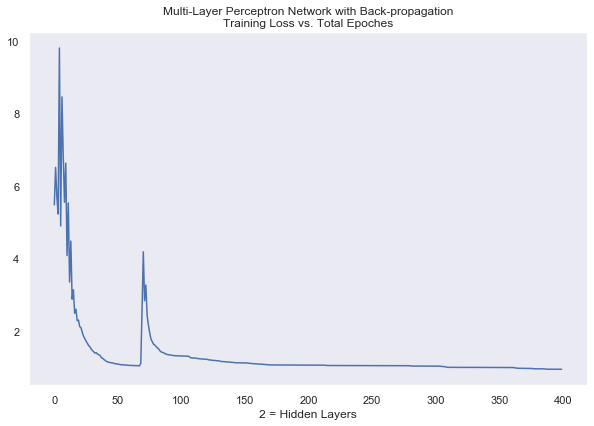

Hidden Layers: 3
Loss-Cost Score: 0.422


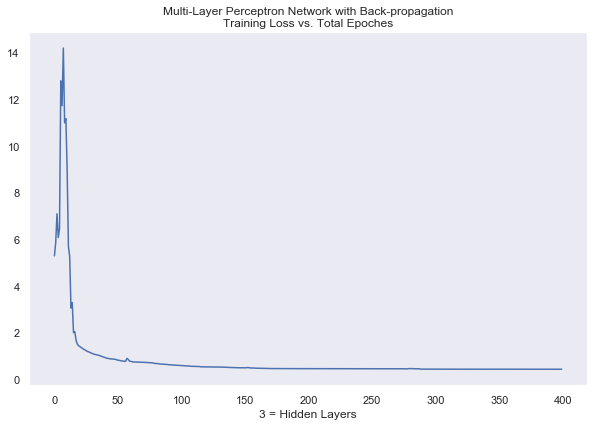

Hidden Layers: 4
Loss-Cost Score: 0.288


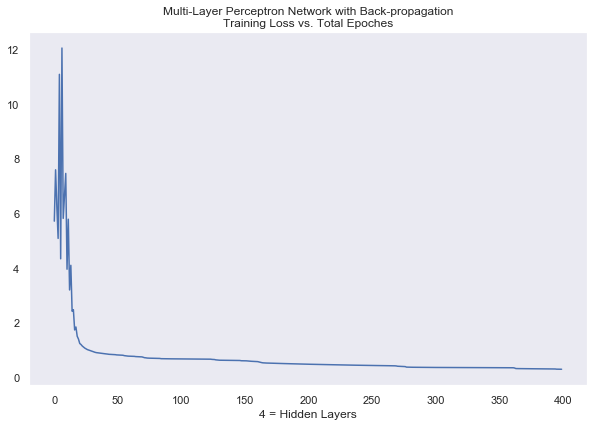

Hidden Layers: 5
Loss-Cost Score: 0.36


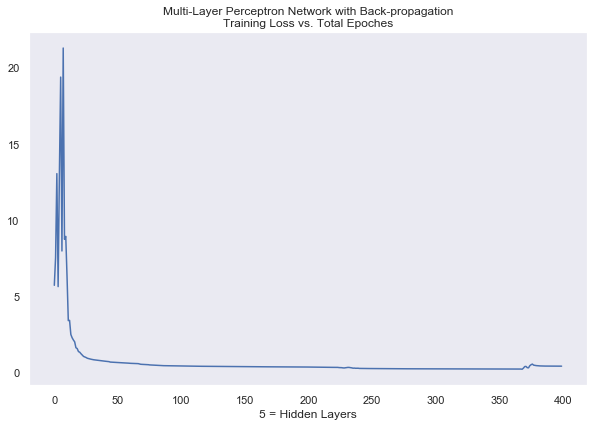

In [29]:
epochs = 400    # Number of Epochs
eta = 0.005     # Learning Rate
alpha = 0.7     # Momentum
n_features = np.shape(X)[1]   # Number of nodes in a hidden layer
# n_hidden = 3    # Number of Hidden Layers - Depth of Architecture
n_output = 2    # Number of Output_nodes; Binary=2

print('TRAINING OF THE MULTI-LAYER PERCEPTRON NETWORK')
layers = [2, 3, 4, 5]
var_name = 'Hidden Layers'
for n_hidden in layers:
    print('{}: {}'.format(var_name, n_hidden))
    params, loss_array = run_grad_desc(epochs, eta, alpha, X_train, Y_train, n_features, n_hidden, n_output)
    cart_plot(n_hidden, var_name, epochs)

## Recurrent Neural Network

In [30]:
# import the required libraries
# import tensorflow as tf
from tensorflow import keras

In [31]:
'''
Report the Numpy n-dimensional array characteristics.
RETURN: None; print the characteristics.
'''
def print_array_attrs(arr, txt):
    print('--------------------------')
    print('DATASET                 {}'.format(txt))
    print('dType                   {}'.format(arr.dtype))      # the array data type
    print('num_dimensions          {}'.format(arr.ndim))       # numbr of dimensions
    print('shape                   {}'.format(arr.shape))      # the array shape
    print('stride                  {}'.format(arr.strides))    # the stride of the array
    print('total num_elements      {}\n'.format(arr.size))       # number of elements
    print('memory address          {}'.format(arr.data))       # the memory address
    print('element length, bytes   {}'.format(arr.itemsize))   # length of one array element, in bytes
    print('elements size, bytes    {}'.format(arr.nbytes))     # total bytes consumed of the elements
    print('memory layout\n{}'.format(arr.flags))      # memory layout

### Train the Network

In [32]:
x_train = X_train.copy()
x_test = X_test.copy()
x_val = X_val.copy()

y_train = Y_train.copy()
y_test = Y_test.copy()
y_val = Y_val.copy()

In [33]:
# reshape input to be [samples, time steps, features]
# for the RNN
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))
x_val = np.reshape(x_val, (x_val.shape[0], 1, x_val.shape[1]))

In [34]:
# create and fit the LSTM network
model = keras.models.Sequential()
model.add(keras.layers.LSTM(4, input_shape=(1, 478)))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 4)                 7728      
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 7,733
Trainable params: 7,733
Non-trainable params: 0
_________________________________________________________________


In [35]:
x_train_val, y_train_val = x_train.copy(), y_train.copy()
model.fit(x_train_val, y_train_val, validation_data=(x_test, y_test), epochs=3, batch_size=1, verbose=1)

Train on 1755 samples, validate on 586 samples
Epoch 1/3
1755/1755 [==============================] - 40s 23ms/sample - loss: 0.5037 - accuracy: 0.8182 - val_loss: 0.3777 - val_accuracy: 0.8925
Epoch 2/3
1755/1755 [==============================] - 28s 16ms/sample - loss: 0.2483 - accuracy: 0.9453 - val_loss: 0.2553 - val_accuracy: 0.9113
Epoch 3/3
1755/1755 [==============================] - 30s 17ms/sample - loss: 0.1348 - accuracy: 0.9744 - val_loss: 0.1805 - val_accuracy: 0.9283


In [36]:
# Evaluate model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 92.83%


## Results

This assignment achieved the 3 neural network model architectures specified at the beginning of this document: 1) a simple neural network, 2) a deep neural network, and 3) a recurrent neural network.
<br>  
The simple neural network was the least performant of the models as compared to the deep neural network. As shown in the results above, the primary imrpovement between these 2 models is the inclusion of additional hidden layers for the latter of the 2 architectures.
<br>  
In order to further evaluate these 2 architectures it would be prudent to apply a 'predict' algorithm, however, this method was not derived at the onset of the originating assignmnet (assignment 8). In this approach, a total of 5 hidden layers were examined and shown that at approximately 25 epoches the model is most efficiently trained and readied for said predictions. 
<br>  
The recurrent neural network outperforms the prior 2 architectures, mainly that such a model is intended for time series data. The results derived here show a 93% accuracy.
<br>  
For the diaper manufacturer, further effort should focus on identifcation of those sensors beyond the 93% accuracy. The manufacturer should understand that false positives are inherent to machine learning practices, and that perhaps, implimenting redundant sensor measurements may help to mitigate such outcomes.